In [11]:
import random

num_city = 100
num_air = 3
cities = set()
airports = []

for i in range(num_city):
    x = random.random()
    y = random.random()
    cities.add((x,y))
    
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))
    
def f():
    distance = 0
    for a in airports:
        for c in cities:
            distance += ((a[0] - c[0])**2) + ((a[1] - c[1])**2)
    return distance

print(f())

def split_cities():
    c1 = set()
    c2 = set()
    c3 = set()
    
    for c in cities:
        distanceA = ((airports[0][0] - c[0])**2) + ((airports[0][1] - c[1])**2)
        distanceB = ((airports[1][0] - c[0])**2) + ((airports[1][1] - c[1])**2)
        distanceC = ((airports[2][0] - c[0])**2) + ((airports[2][1] - c[1])**2)
        distances = [distanceA, distanceB, distanceC]
        if distanceA == min(distances):
            c1.add(c)
        elif distanceB == min(distances):
            c2.add(c)
        else:
            c3.add(c)
    return c1, c2, c3

c1, c2, c3 = split_cities()
# print(c1)
# print(c2)
# print(c3)
print("Current Airports:",airports)

def gradient_element():
    gradient = [0,0,0,0,0,0]
    for c in c1:
        gradient[0] += (airports[0][0] - c[0])
        gradient[1] += (airports[0][1] - c[1])
    print("Gradient of city 1 is:",2*gradient[0],2*gradient[1])
    for c in c2:
        gradient[2] += (airports[0][0] - c[0])
        gradient[3] += (airports[0][1] - c[1])
    print("Gradient of city 2 is:",2*gradient[2],2*gradient[3]) 
    for c in c3:
        gradient[4] += (airports[0][0] - c[0])
        gradient[5] += (airports[0][1] - c[1])
    print("Gradient of city is:",2*gradient[4],2*gradient[5])
    pass

gradient_element()

#TODO 
#Create function that itertes function of n epochs, default is 20


104.7726421574661
Current Airports: [(0.8006978353418621, 0.8441318644472675), (0.5172579703372908, 0.18785638765442425), (0.009417170122032026, 0.4365050611212684)]
Gradient of city 1 is: 7.465016553292115 5.9986218370081374
Gradient of city 2 is: 11.608736329545998 41.36901630075502
Gradient of city is: 39.83579956028437 19.39612756170596


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

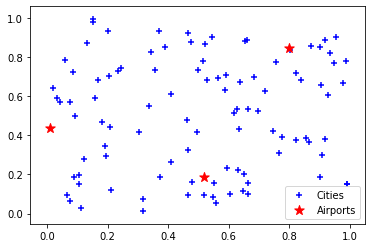

In [12]:
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

The objective function is given by $f(x_1,y_1,x_2,y_2,x_3,y_3)=\sum_{i=1}^n\sum_{c\in C_i}(x_i-x_c)^2+(y_i-y_c)^2$ where $n$ is the number of the airports and $C_i$ is the set of cities whose closest airport is airport $i$. The goal of the program is determining the locations of airports that minimize the objective function using gradient based optimizatoin. 

The gradient of the objective function is $\nabla f(x_1,y_1,x_2,y_2,x_3,y_3)=\big(2\sum_{c\in C_1}(x_1-x_c),2\sum_{c\in C_1}(y_1-y_c),2\sum_{c\in C_2}(x_2-x_c),2\sum_{c\in C_2}(y_2-y_c),2\sum_{c\in C_3}(x_3-x_c),2\sum_{c\in C_3}(y_3-y_c)\big)$

By updating $(x_1,y_1,x_2,y_2,x_3,y_3)\gets (x_1,y_1,x_2,y_2,x_3,y_3)-\alpha \nabla f(x_1,y_1,x_2,y_2,x_3,y_3)$ where $0<\alpha\ll1$ is a constant, **find the optimal locations of the airports $(x_1,y_1,x_2,y_2,x_3,y_3)$.**

Every time the locations of the airports are updated, **plot the objective value as shown in the figure**.

<Note: The objective values may be different than the example.>
<img src="airports_loss.png" style="width:400px">